In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdelazizsami/cdc-diabetes-health-indicators")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cdc-diabetes-health-indicators


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')
sns.set()

In [3]:
os.listdir('/kaggle/input/cdc-diabetes-health-indicators')

['diabetes_binary_5050split_health_indicators_BRFSS2015.csv',
 'diabetes_binary_health_indicators_BRFSS2015.csv',
 'diabetes_012_health_indicators_BRFSS2015.csv']

In [4]:
df = pd.read_csv('/kaggle/input/cdc-diabetes-health-indicators/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [5]:
df.shape

(70692, 22)

In [6]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [8]:
df.apply(pd.isnull).sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
df.duplicated().sum()

1635

In [5]:
df.drop_duplicates(inplace = True)

In [11]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
1.0    35097
0.0    33960
Name: count, dtype: int64

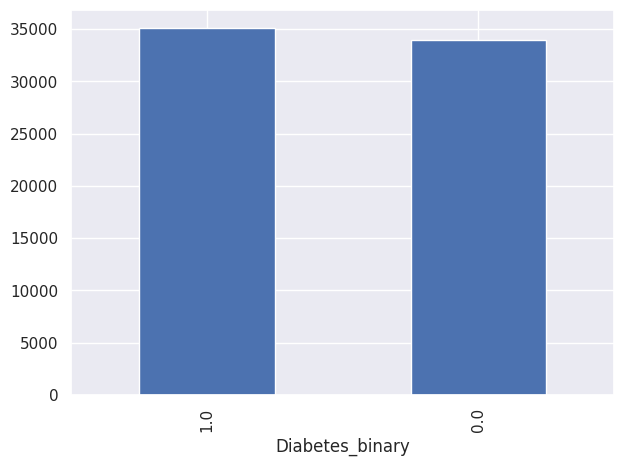

In [12]:
df['Diabetes_binary'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.show()

In [13]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [14]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,...,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.605659,...,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.488712,...,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [15]:
num_cols, cat_cols = [],[]
for column in df.columns:
    if df[column].nunique() < 20:
        cat_cols.append(column)
    else:
        num_cols.append(column)

In [17]:
print(f'+++ Categorical columns: {cat_cols}')
print(f'*** Numerical columns: {num_cols}')

+++ Categorical columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
*** Numerical columns: ['BMI', 'MentHlth', 'PhysHlth']


Diabetes_binary
Number of unique values: 2
Unique values: [0. 1.]
Value counts of unique values:
 Diabetes_binary
1.0    35097
0.0    33960
Name: count, dtype: int64


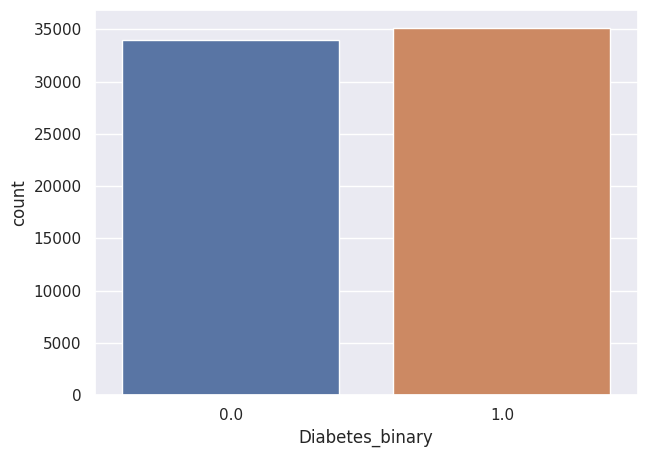

HighBP
Number of unique values: 2
Unique values: [1. 0.]
Value counts of unique values:
 HighBP
1.0    39447
0.0    29610
Name: count, dtype: int64


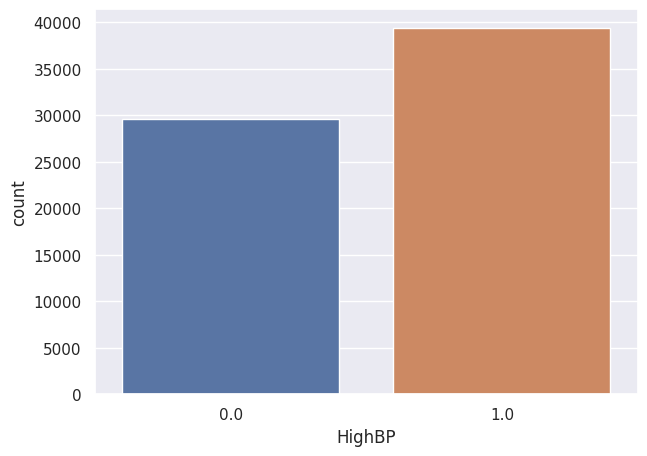

HighChol
Number of unique values: 2
Unique values: [0. 1.]
Value counts of unique values:
 HighChol
1.0    36692
0.0    32365
Name: count, dtype: int64


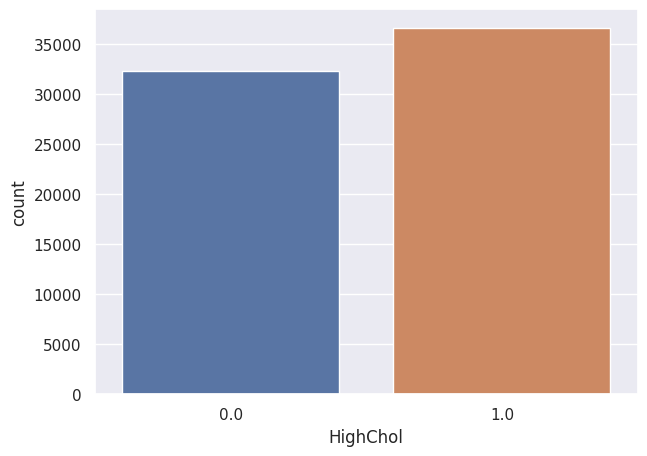

CholCheck
Number of unique values: 2
Unique values: [1. 0.]
Value counts of unique values:
 CholCheck
1.0    67317
0.0     1740
Name: count, dtype: int64


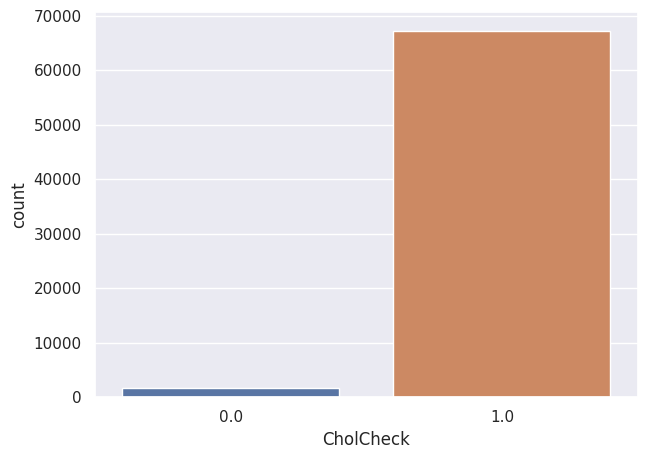

Smoker
Number of unique values: 2
Unique values: [0. 1.]
Value counts of unique values:
 Smoker
0.0    35776
1.0    33281
Name: count, dtype: int64


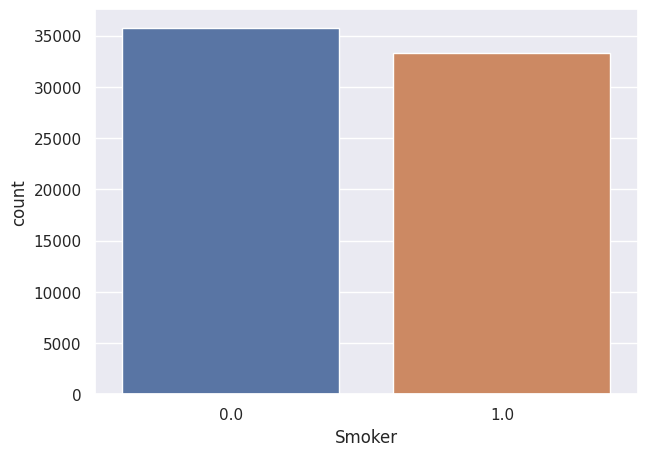

Stroke
Number of unique values: 2
Unique values: [0. 1.]
Value counts of unique values:
 Stroke
0.0    64662
1.0     4395
Name: count, dtype: int64


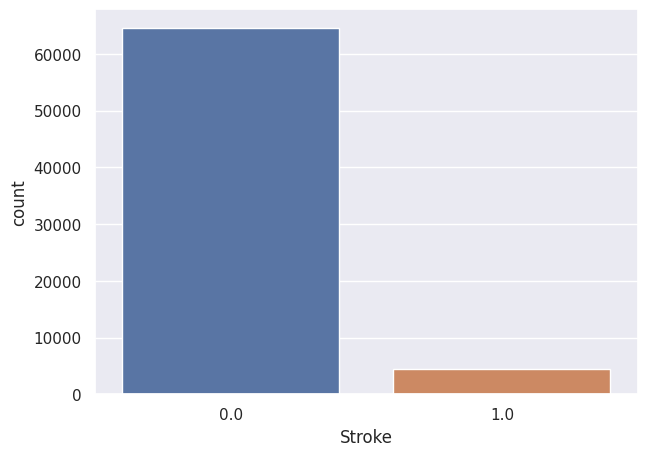

HeartDiseaseorAttack
Number of unique values: 2
Unique values: [0. 1.]
Value counts of unique values:
 HeartDiseaseorAttack
0.0    58638
1.0    10419
Name: count, dtype: int64


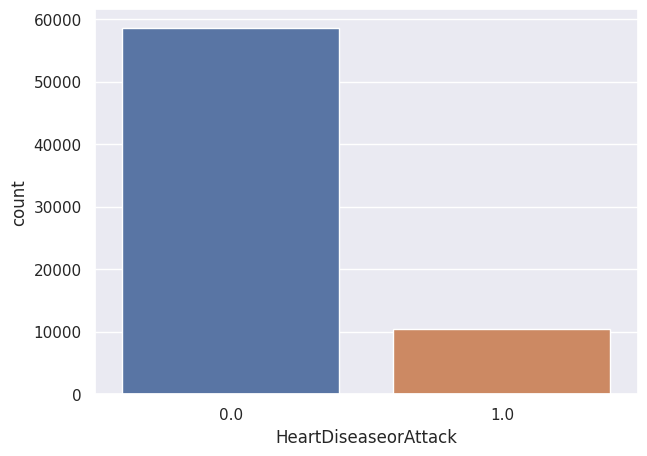

PhysActivity
Number of unique values: 2
Unique values: [1. 0.]
Value counts of unique values:
 PhysActivity
1.0    48097
0.0    20960
Name: count, dtype: int64


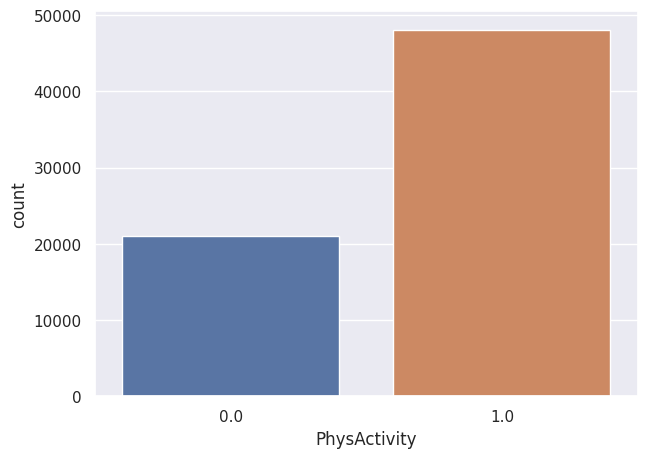

Fruits
Number of unique values: 2
Unique values: [0. 1.]
Value counts of unique values:
 Fruits
1.0    41825
0.0    27232
Name: count, dtype: int64


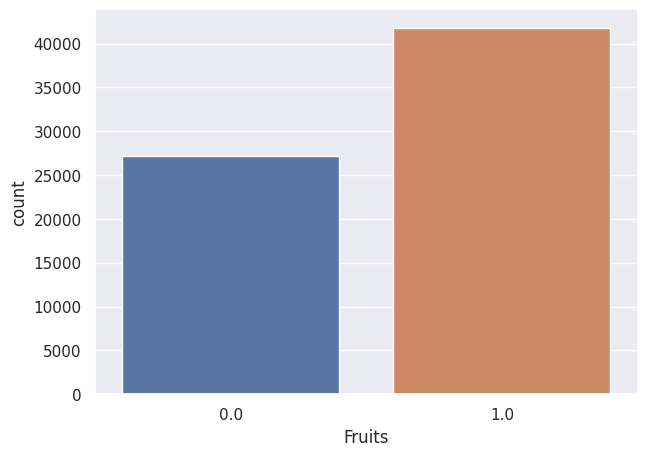

Veggies
Number of unique values: 2
Unique values: [1. 0.]
Value counts of unique values:
 Veggies
1.0    54149
0.0    14908
Name: count, dtype: int64


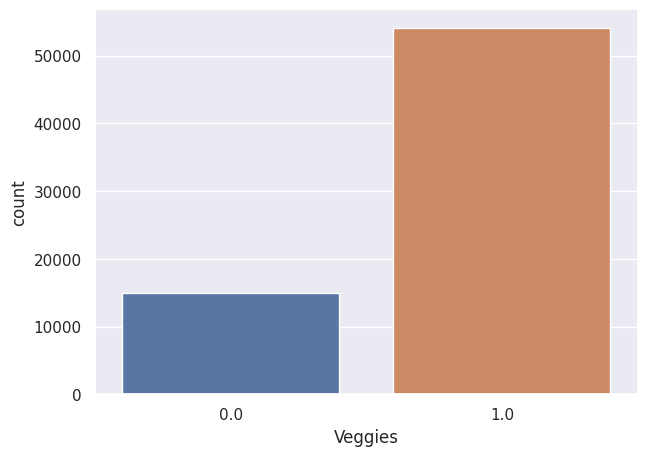

HvyAlcoholConsump
Number of unique values: 2
Unique values: [0. 1.]
Value counts of unique values:
 HvyAlcoholConsump
0.0    66052
1.0     3005
Name: count, dtype: int64


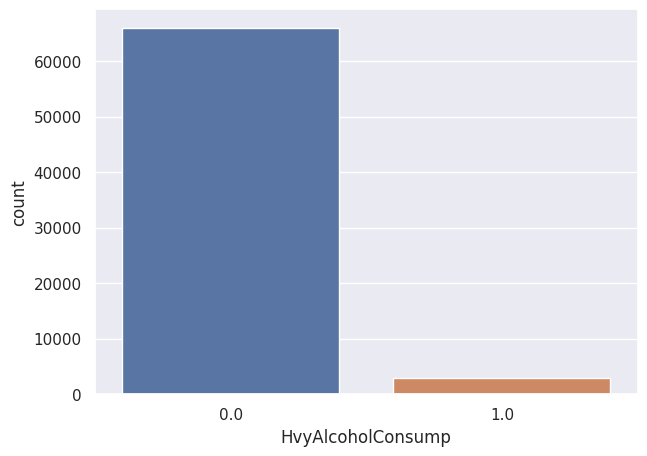

AnyHealthcare
Number of unique values: 2
Unique values: [1. 0.]
Value counts of unique values:
 AnyHealthcare
1.0    65874
0.0     3183
Name: count, dtype: int64


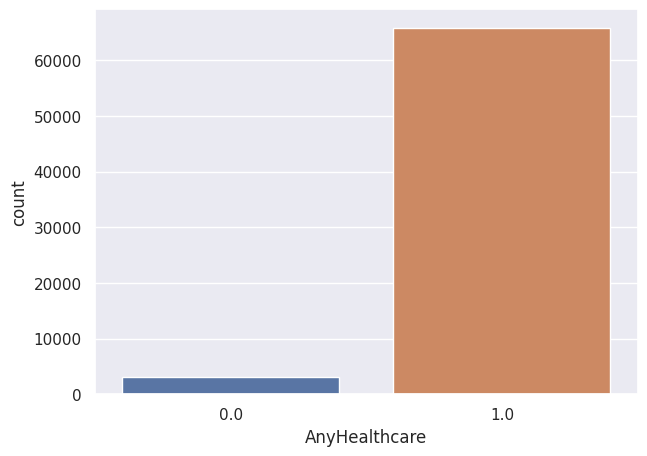

NoDocbcCost
Number of unique values: 2
Unique values: [0. 1.]
Value counts of unique values:
 NoDocbcCost
0.0    62418
1.0     6639
Name: count, dtype: int64


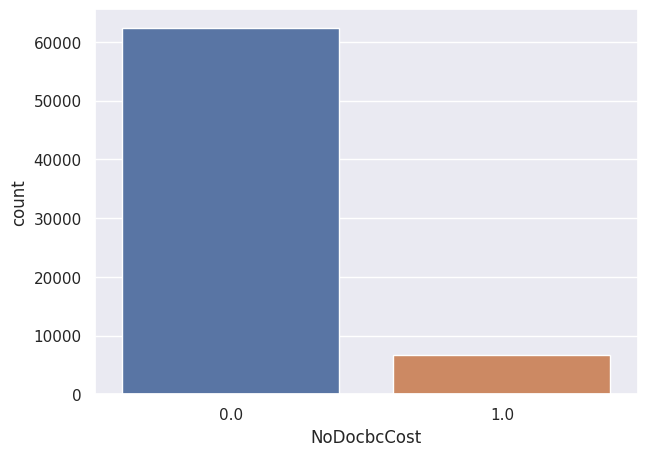

GenHlth
Number of unique values: 5
Unique values: [3. 1. 2. 4. 5.]
Value counts of unique values:
 GenHlth
3.0    23246
2.0    19105
4.0    13292
1.0     7607
5.0     5807
Name: count, dtype: int64


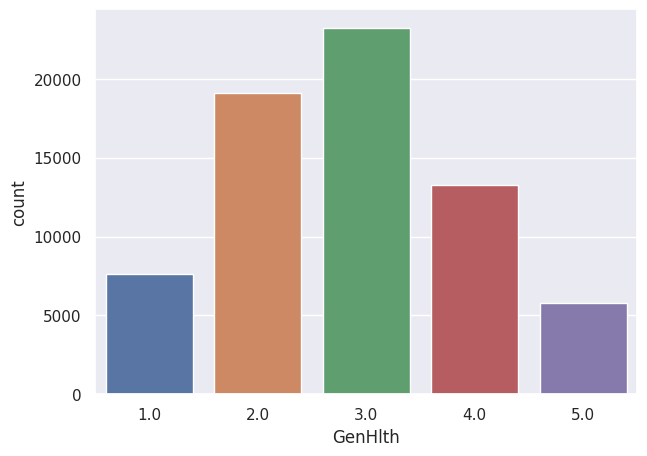

DiffWalk
Number of unique values: 2
Unique values: [0. 1.]
Value counts of unique values:
 DiffWalk
0.0    51198
1.0    17859
Name: count, dtype: int64


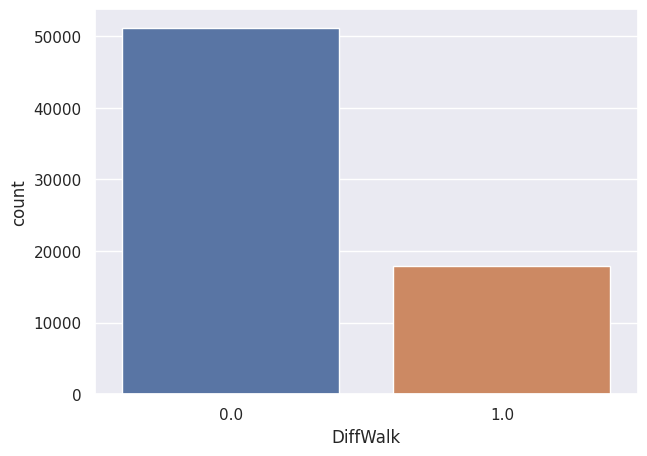

Sex
Number of unique values: 2
Unique values: [1. 0.]
Value counts of unique values:
 Sex
0.0    37535
1.0    31522
Name: count, dtype: int64


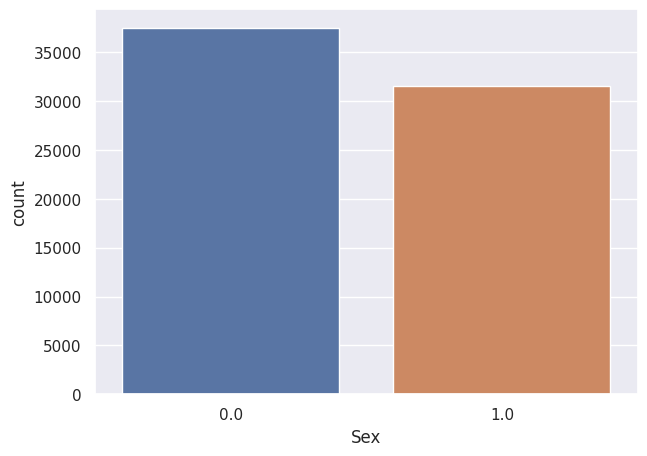

Age
Number of unique values: 13
Unique values: [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]
Value counts of unique values:
 Age
10.0    10585
9.0      9873
8.0      8392
11.0     7932
7.0      6627
13.0     5396
12.0     5358
6.0      4472
5.0      3387
4.0      2691
3.0      1994
2.0      1378
1.0       972
Name: count, dtype: int64


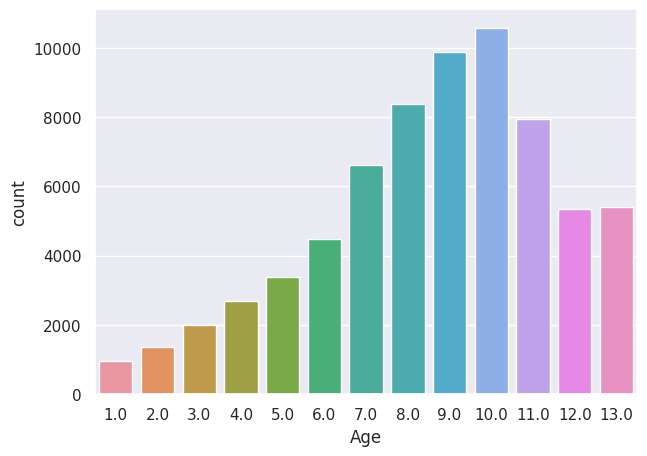

Education
Number of unique values: 6
Unique values: [6. 5. 4. 3. 2. 1.]
Value counts of unique values:
 Education
6.0    24646
5.0    19845
4.0    19397
3.0     3447
2.0     1647
1.0       75
Name: count, dtype: int64


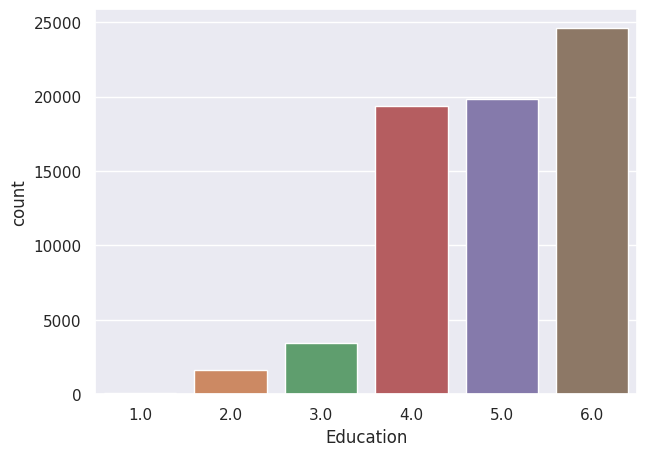

Income
Number of unique values: 8
Unique values: [8. 7. 6. 3. 4. 1. 5. 2.]
Value counts of unique values:
 Income
8.0    19307
7.0    11274
6.0    10195
5.0     7975
4.0     6646
3.0     5552
2.0     4497
1.0     3611
Name: count, dtype: int64


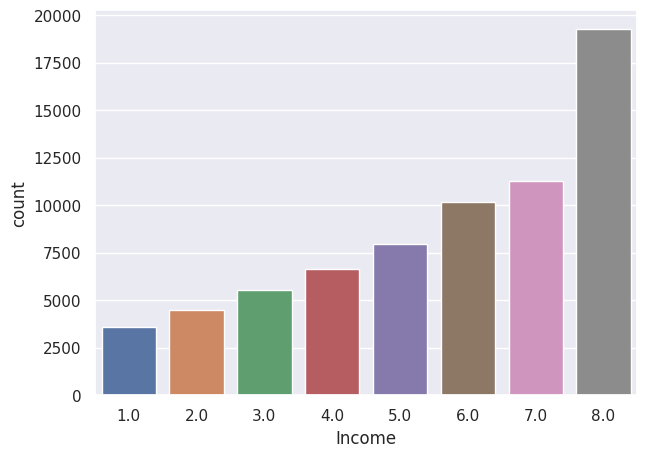

In [18]:
for column in cat_cols:
    print(f'{column}')
    print(f'Number of unique values: {df[column].nunique()}')
    print(f'Unique values: {df[column].unique()}')
    print(f'Value counts of unique values:\n {df[column].value_counts()}')
    plt.figure(figsize = (7, 5))
    sns.countplot(data = df, x = column)
    plt.show()
    print('='*80)

In [6]:
df = df[df['Education'] != 1.0]

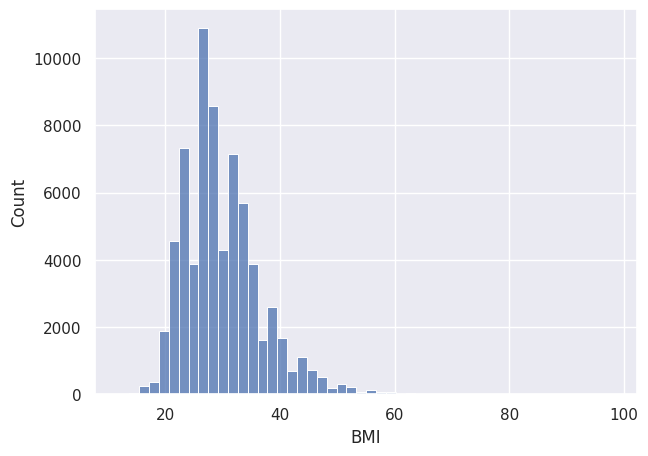

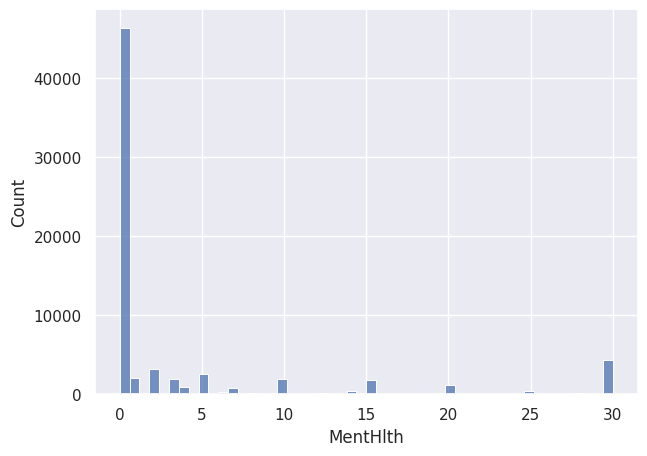

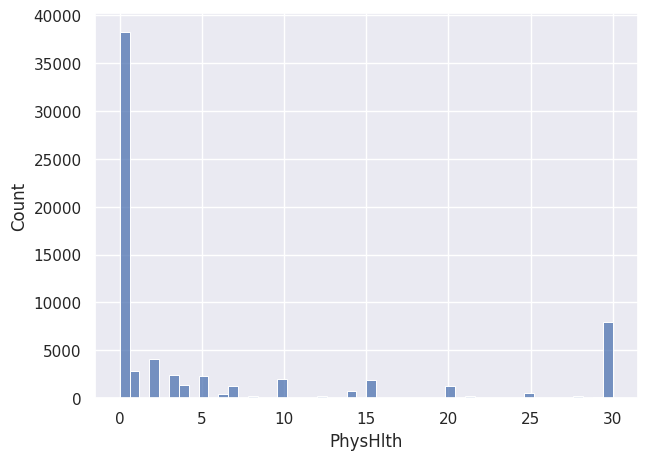

In [20]:
for column in num_cols:
    plt.figure(figsize = (7, 5))
    sns.histplot(data = df, x = column, bins = 50)
    plt.show()

In [22]:
df['PhysHlth'].value_counts()

PhysHlth
0.0     38276
30.0     7932
2.0      4090
1.0      2837
3.0      2435
5.0      2329
10.0     1977
15.0     1908
4.0      1375
7.0      1325
20.0     1290
14.0      800
25.0      557
6.0       447
8.0       275
21.0      228
28.0      211
12.0      205
29.0       95
9.0        55
18.0       50
16.0       50
17.0       35
27.0       34
22.0       31
23.0       27
26.0       26
13.0       26
24.0       24
11.0       22
19.0       10
Name: count, dtype: int64

In [23]:
df['MentHlth'].value_counts()

MentHlth
0.0     46444
30.0     4309
2.0      3247
5.0      2515
1.0      2039
3.0      1961
10.0     1921
15.0     1764
20.0     1123
4.0       981
7.0       824
25.0      425
14.0      352
6.0       288
8.0       198
12.0      130
28.0       99
21.0       84
29.0       53
18.0       42
16.0       28
9.0        28
22.0       22
17.0       18
26.0       17
27.0       17
13.0       15
23.0       13
24.0       10
11.0        8
19.0        7
Name: count, dtype: int64

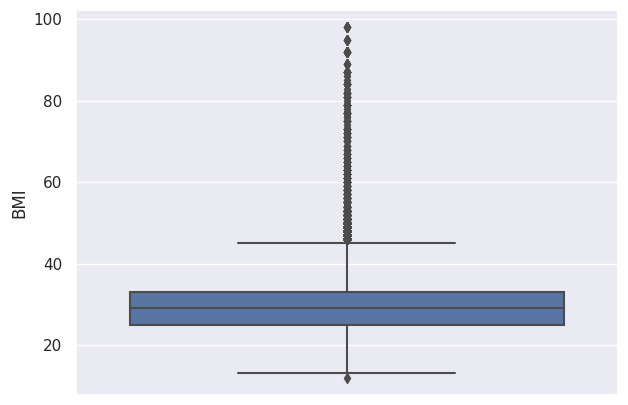

In [24]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = df, y = 'BMI')
plt.show()

In [26]:
df[df['BMI'] > 43].shape

(3004, 22)

In [7]:
df = df[df['BMI'] <= 43]

In [28]:
df[df['BMI'] < 14].shape

(9, 22)

In [8]:
df = df[df['BMI'] >= 14]

In [30]:
df.shape

(65969, 22)

In [31]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    33260
1.0    32709
Name: count, dtype: int64

In [32]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000,...,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000,65969.000000
mean,0.495824,0.562037,0.527066,0.974261,29.024072,0.483530,0.063196,0.149828,0.706271,0.608998,...,0.954751,0.093210,2.829435,3.685913,5.682912,0.242796,0.462778,8.639649,4.914035,5.694720
std,0.499986,0.496140,0.499271,0.158358,5.482147,0.499732,0.243318,0.356905,0.455473,0.487978,...,0.207850,0.290729,1.101649,8.065393,9.947492,0.428776,0.498616,2.870924,1.021176,2.160809
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
X = df.drop(columns = ['Diabetes_binary'], axis = 1)
y = df['Diabetes_binary']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101, stratify = y)

In [11]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, stratify = y_test)

In [12]:
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')
print(f'Validation set size: {len(X_valid)}')

Training set size: 46178
Test set size: 9895
Validation set size: 9896


In [14]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
X_valid.reset_index(drop = True, inplace = True)

In [20]:
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
y_valid.reset_index(drop = True, inplace = True)

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

In [42]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)

In [44]:
lr = LogisticRegression()

In [45]:
cvs = cross_val_score(lr, X_train_scaled, y_train, cv = skf)

In [50]:
print(f'Validation accuracy of logistic regression model: {cvs.mean():.2f}')

Validation accuracy of logistic regression model: 0.74


In [52]:
lr.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_p = lr.predict(X_test)

In [55]:
y_pred = np.where(y_p > 0.5, 1, 0)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73      4989
         1.0       0.72      0.75      0.74      4906

    accuracy                           0.73      9895
   macro avg       0.73      0.73      0.73      9895
weighted avg       0.73      0.73      0.73      9895



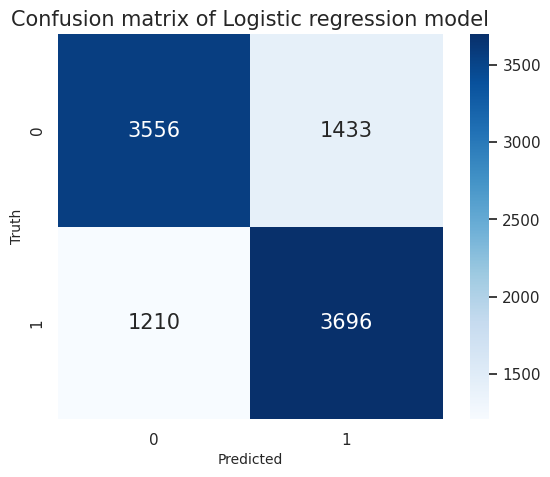

In [57]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd', cmap = 'Blues')
plt.title('Confusion matrix of Logistic regression model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import trange

In [19]:
class MyDataset(nn.Module):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]
        return x, y

In [23]:
train_dataset = MyDataset(X_train_scaled, y_train)
test_dataset = MyDataset(X_test_scaled, y_test)
valid_dataset = MyDataset(X_valid_scaled, y_valid)

In [79]:
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = False)
valid_loader = DataLoader(valid_dataset, batch_size = 64, shuffle = False)

In [69]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


In [70]:
def plot_results(train_accs, train_losses, valid_accs, valid_losses):
    xs = np.arange(1, len(train_accs) + 1, 1)
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    axes[0].plot(xs, train_accs, label = 'Train')
    axes[0].plot(xs, valid_accs, label = 'Validation')
    axes[0].set_title('Training accuracy vs Validation accuracy', fontsize = 15)
    axes[0].set_xlabel('Epoch', fontsize = 10)
    axes[0].set_ylabel('Accuracy', fontsize = 10)
    axes[0].set_xticks(xs)
    axes[0].legend()
    axes[1].plot(xs, train_losses, label = 'Train')
    axes[1].plot(xs, valid_losses, label = 'Validation')
    axes[1].set_title('Training loss vs Validation loss', fontsize = 15)
    axes[1].set_xlabel('Epoch', fontsize = 10)
    axes[1].set_ylabel('Loss', fontsize = 10)
    axes[1].set_xticks(xs)
    axes[1].legend()
    plt.tight_layout()
    plt.show()

In [71]:
def train_step(model, criterion, optimizer, dataloader, device = device):
    model.train()
    total_acc = 0
    total_loss = 0
    for x, y in dataloader:
        x, y = x.to(device).float(), y.to(device).float().unsqueeze(1)
        optimizer.zero_grad()
        pred = model(x)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        probs = torch.sigmoid(pred)
        preds = (probs >= 0.5).float()
        total_acc += (preds == y).sum().item()
    return total_loss / len(dataloader), 100 * total_acc / len(dataloader.dataset)

In [72]:
def valid_step(model, criterion, dataloader, device = device):
    model.eval()
    total_acc = 0
    total_loss = 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device).float(), y.to(device).float().unsqueeze(1)
            pred = model(x)
            total_loss += criterion(pred, y).item()
            probs = torch.sigmoid(pred)
            preds = (probs >= 0.5).float()
            total_acc += (preds == y).sum().item()
    return total_loss / len(dataloader), 100 * total_acc / len(dataloader.dataset)

In [73]:
def train_model(model, n_epochs, optimizer, train_loader, valid_loader, device = device):
    train_accs = []
    train_losses = []
    valid_accs = []
    valid_losses = []
    criterion = nn.BCEWithLogitsLoss()
    pbar = trange(n_epochs)
    for epoch in pbar:
        train_loss, train_acc = train_step(model, criterion, optimizer, train_loader, device)
        valid_loss, valid_acc = valid_step(model, criterion, valid_loader, device)
        train_accs.append(train_acc)
        train_losses.append(train_loss)
        valid_accs.append(valid_acc)
        valid_losses.append(valid_loss)
        pbar.set_description(f'Train acc: {train_acc:.3f} | Train loss: {train_loss:.3f} | Validation acc: {valid_acc:.3f} | Valid Loss: {valid_loss:.3f}')
    plot_results(train_accs, train_losses, valid_accs, valid_losses)
    return {'train_acc': train_acc, 'train_loss': train_loss, 'valid_acc': valid_acc, 'valid_loss': valid_loss}

In [74]:
X_train_scaled.shape

(46178, 21)

In [85]:
class NNmodel(nn.Module):
    def __init__(self, input_size):
        super(NNmodel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size , 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.50),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.50),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.50),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.50),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.50),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

Train acc: 74.514 | Train loss: 0.516 | Validation acc: 74.889 | Valid Loss: 0.511: 100%|██████████| 30/30 [01:49<00:00,  3.64s/it]


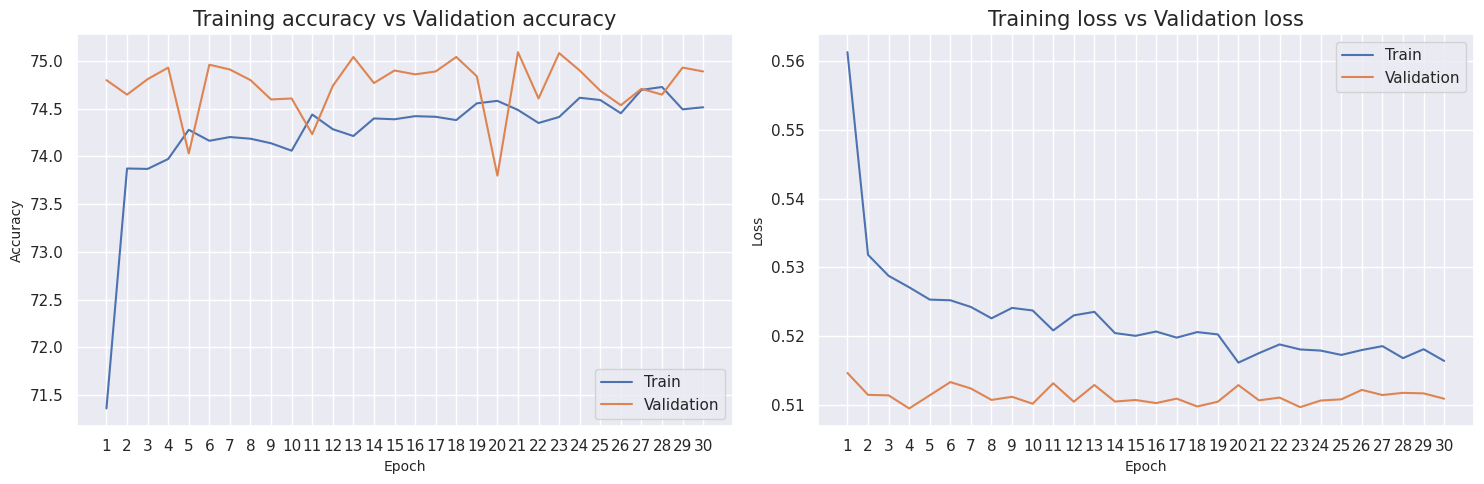

In [87]:
model = NNmodel(input_size = 21).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
results = train_model(model, 30, optimizer, train_loader, valid_loader, device = device)

In [88]:
criterion = nn.BCEWithLogitsLoss()

In [89]:
test_loss, test_acc = valid_step(model, criterion, test_loader, device = device)

In [90]:
print(f'Test Loss: {test_loss:.3f} | Test Accuracy: {test_acc:.3f}')

Test Loss: 0.511 | Test Accuracy: 74.765
